   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

       species  
0  Iris-setosa  
1  Iris-setosa  
2  Iris-setosa  
3  Iris-setosa  
4  Iris-setosa  


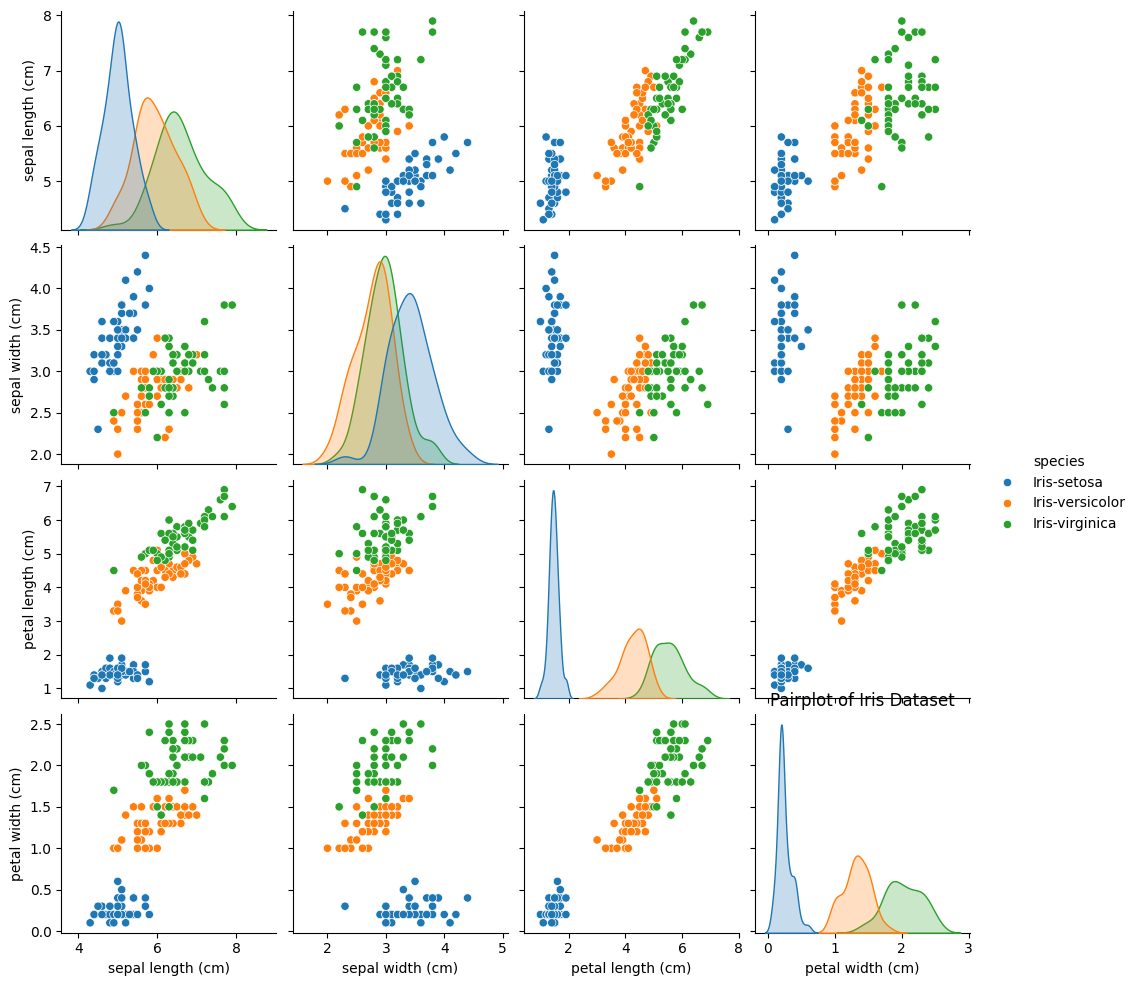

Best parameters found:  {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 50}
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30

Confusion Matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]
Model saved as 'iris_random_forest_model.pkl'.


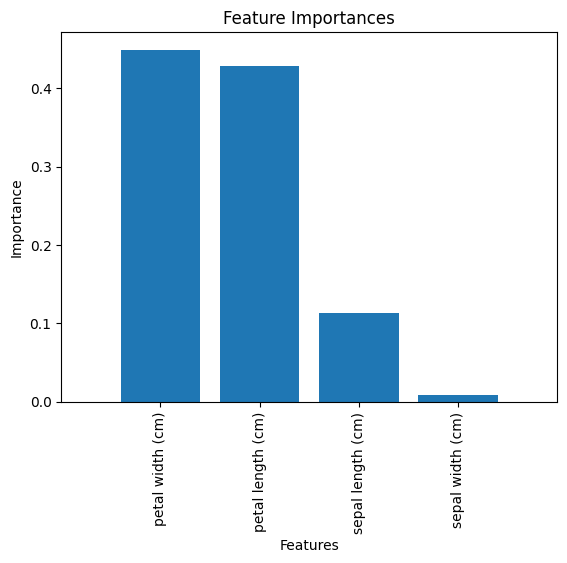

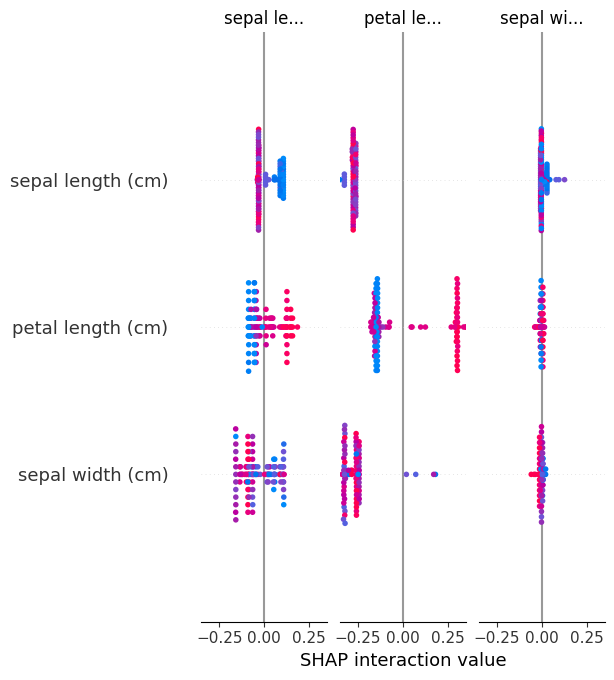

In [1]:
# Step 1: Install Required Libraries
# Run this cell only if the required libraries are not installed
import sys
!{sys.executable} -m pip install pandas scikit-learn matplotlib joblib shap seaborn

# Step 2: Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib
import shap
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Step 3: Load the Iris Dataset
from sklearn.datasets import load_iris

# Load the dataset
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['species'] = iris.target

# Map target numbers to species names
data['species'] = data['species'].map({0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'})

# Display the first few rows of the dataset
print(data.head())

# Step 4: Exploratory Data Analysis (EDA)
sns.pairplot(data, hue='species')
plt.title("Pairplot of Iris Dataset")
plt.show()

# Step 5: Split the Dataset into Features and Target Variable
X = data.drop(columns=['species'])  # Features
y = data['species']  # Target variable

# Step 6: Split the Dataset into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Step 7: Hyperparameter Tuning with Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model from grid search
best_model = grid_search.best_estimator_
print("Best parameters found: ", grid_search.best_params_)

# Step 8: Evaluate the Model
y_pred = best_model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Step 9: Save the Model for Future Use
joblib.dump(best_model, 'iris_random_forest_model.pkl')
print("Model saved as 'iris_random_forest_model.pkl'.")

# Step 10: Visualize Feature Importance
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure()
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.ylabel("Importance")
plt.xlabel("Features")
plt.show()

# Step 11: Implement SHAP for Model Explainability
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_train)

# Visualize the SHAP values
shap.summary_plot(shap_values, X_train, feature_names=X.columns)